## Подготовка

### Установка tensorflow, если его нет

In [205]:
import pip

packages = !pip list
packages = [i.split() for i in packages]
packages = [i[0] for i in packages if len(i) == 2]

if "tensorflow" not in packages:
    !pip install tensorflow
if "numpy" not in packages:
    !pip install tensorflow
if "matplotlib" not in packages:
    !pip install tensorflow

### Импорт библиотек

In [206]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Загрузка необходимых наборов данных

In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Предобработка

### Каждое изображение состоит из изображений 32 Х 32 пикселей и 3-х цветов на каждом пикселе в диапазоне [0, 255]

In [3]:
train_images[0].shape

(32, 32, 3)

In [53]:
train_images[0][0][0]

array([59, 62, 63], dtype=uint8)

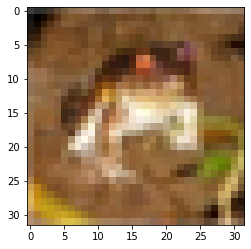

In [8]:
plt.imshow(train_images[0])

### Для удобства переведём значение каждого пикселя в диапазон [0, 1]

In [54]:
train_images, test_images = train_images / 255.0, test_images / 255.0

## Создание модели

### Определяем модель

In [56]:
model = models.Sequential()

### Добавим необходимые слои:
- Conv2D - нейроны для считывания каждого пикселя

- MaxPoling2D - для уменьшения входных данных по их пространственным размерам, принимая максимальное значение по входному окну для каждого канала ввода

In [57]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

#### Повторим несколько раз для достаточного уменьшения разрешения найденных элементов изображения, необходимых для классификации новых

In [58]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Преобразуем полученную комбинацию параметров к необходимому нам выходу:
- Слой Flatten - нужен для преобразования многомерного массива в одномерный
(размерность (4, 4, 64) -> 1024)
- Слой Dense - сворачивает одномерный массив в более меньший
(размерность 1024 -> 64)
- Слой Dense - ещё раз сворачивает одномерный массив уже к нужному нам значение в диапазоне [0, 10] 
(размерность 64 -> 10)
(10 - количество наших классов)

In [59]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#### В итоге модель будет иметь следующий вид

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

### Компилируем модель

In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Обучаем модель и записываем процесс

In [62]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5101 - accuracy: 0.4485 - val_loss: 1.2283 - val_accuracy: 0.5602
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1432 - accuracy: 0.5917 - val_loss: 1.1051 - val_accuracy: 0.6053
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9858 - accuracy: 0.6530 - val_loss: 0.9765 - val_accuracy: 0.6653
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8911 - accuracy: 0.6858 - val_loss: 0.9220 - val_accuracy: 0.6764
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8223 - accuracy: 0.7110 - val_loss: 0.9263 - val_accuracy: 0.6811
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7636 - accuracy: 0.7335 - val_loss: 0.9314 - val_accuracy: 0.6778
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7160 - accuracy: 0.7478 - val_loss: 0.8590 -

#### Посмотрим наглядно, как проходило обучение

313/313 - 2s - loss: 0.8554 - accuracy: 0.7172 - 2s/epoch - 6ms/step


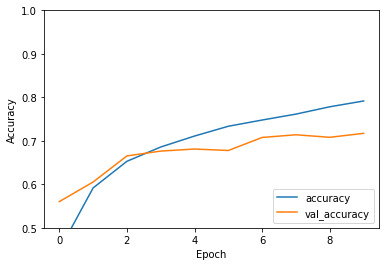

In [63]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#### Итоговая точность

In [64]:
print(f"accuracy = {test_acc}")

accuracy = 0.717199981212616


## Попробуем определить картинку

### Запишем классы, которые умеет определять модель

In [66]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

### Проверим модель на тестовом наборе данных

In [245]:
predictions = model.predict(test_images)

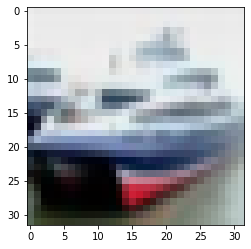

In [236]:
plt.imshow(test_images[1])

In [246]:
class_names[predictions[1].argmax()]

'ship'

Верно
___

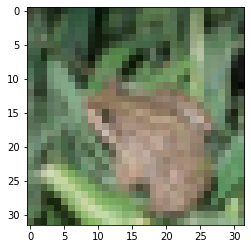

In [249]:
plt.imshow(test_images[4])

In [250]:
class_names[predictions[4].argmax()]

'deer'

Неверно
___

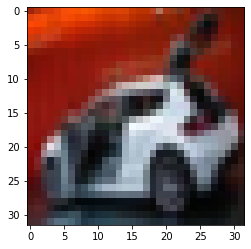

In [252]:
plt.imshow(test_images[6])

In [253]:
class_names[predictions[6].argmax()]

'automobile'

Верно
___

### Вывод

Нейонная сеть работает